In [21]:
%load_ext autoreload
%autoreload 2

import sys  
sys.path.insert(0, 'functions')
sys.path.insert(0, 'training')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
from Clusterer import *
from data_functions import *

### This notebook should remain unchanged, with the exception of editing the values in the cell directly below

In [3]:

root_file = "hcal_pi+_0-110GeVLinear_17degFixed.root"
label = "HCal_0-110GeVLinear_17degFixed"

detector_name = "HcalEndcapPHitsReco" #or "HcalEndcapPInsertHitsReco"
sampling_fraction = 0.02 #or 0.0098

NEvents_Max = 1_000_000 #OK if tree has less events than this

Do_Processing = True 
#saves to path/numpy_file. Only needs to be run frist time. 
# Change to False for messing with plots

In [4]:
if Do_Processing:
    Clusterer = Strawman_Clusterer(root_file, label, detector_name, sampling_fraction, NEvents_Max)
    Clusterer.run_clusterer()
    del Clusterer
#Ignore: " DeprecationWarning: `np.str` "

Loaded 600000 Events


/global/home/users/ftoralesacosta/anaconda3/envs/tin/lib/python3.9/site-packages/awkward0/array/base.py:622: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif isinstance(where, (cls.numpy.ndarray, AwkwardArray)) and issubclass(where.dtype.type, (numpy.str, numpy.str_)):
/global/home/users/ftoralesacosta/anaconda3/envs/tin/lib/python3.9/site-packages/awkward0/array/base.py:624: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprec

Doing Cluster Sum...
Cluster Sum Done!
Applied Sampling Fraction of 0.02 to Cluster Sums
Files saved to ./HCal_0-110GeVLinear_17degFixed/


### Load Strawman (cluster sum) and Generated Data

In [5]:
ClusterSum, GenP = load_ClusterSum_and_GenP(label)

#### Plot Energy Distributions

Plotting QA Distributions...


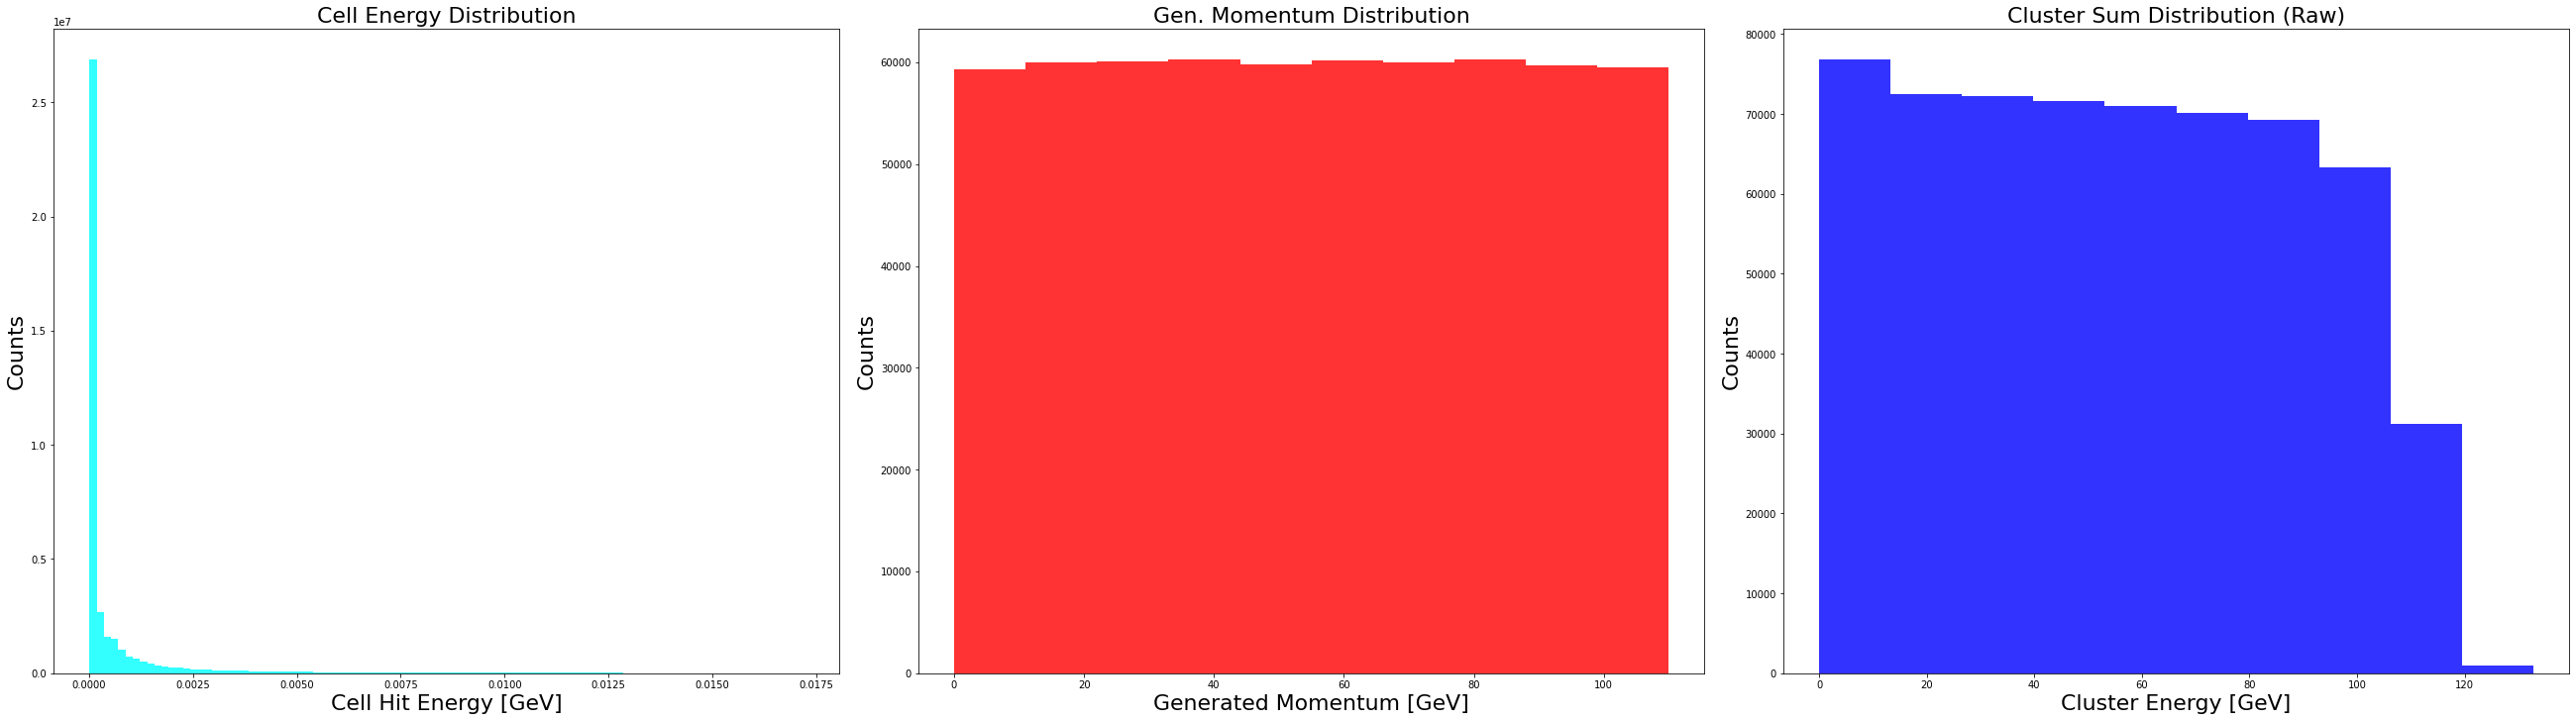

In [6]:
flat_hits_e = load_flat_hits_e(label)
energy_QA_plots(flat_hits_e, GenP, ClusterSum, label)

#### Plot Clusters vs Generated

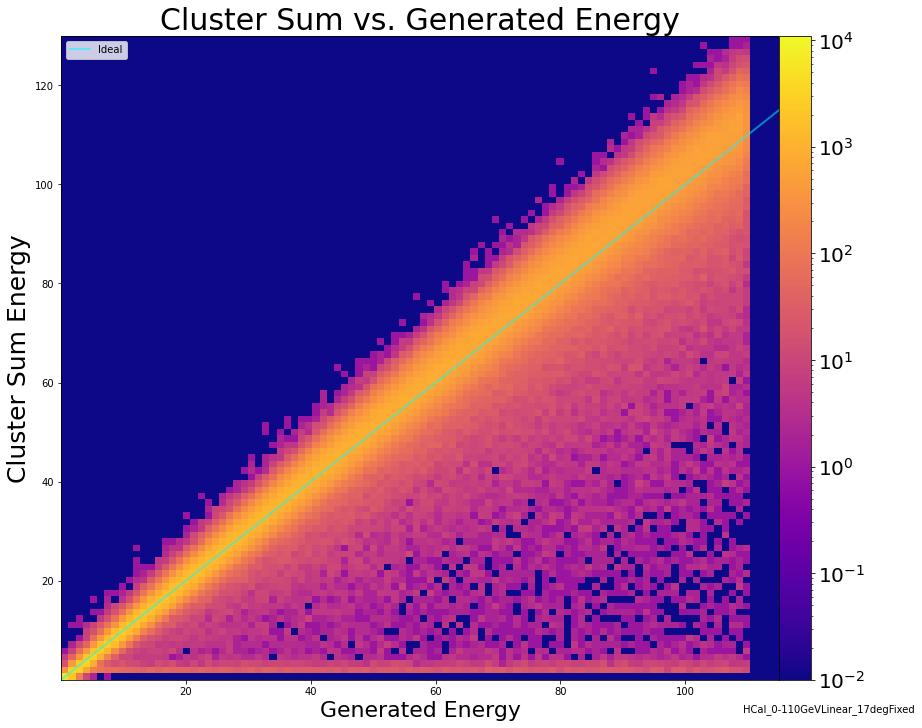

In [7]:
ClusterSum_vs_GenP(ClusterSum, GenP, label)

In [8]:
from NN_Regression import *

In [9]:
NN_Regression = NN_Regressor(label)

In [10]:
NN_Regression.run_NN_regression()

2023-01-17 15:47:55.905895: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.2/lib64:/global/home/users/ftoralesacosta/user_pkg/usr/lib:/global/home/users/ftoralesacosta/user_pkg/usr/lib64:/lib:/lib64:/usr/lib:/usr/lib64
2023-01-17 15:47:55.905923: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-01-17 15:47:55.906251: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions

Epoch 1/400
300/300 [==============================] - 2s 5ms/step - loss: 6.1545 - val_loss: 3.8278 - lr: 0.0010
Epoch 2/400
300/300 [==============================] - 1s 4ms/step - loss: 3.8365 - val_loss: 3.8317 - lr: 0.0010
Epoch 3/400
300/300 [==============================] - 1s 4ms/step - loss: 3.8327 - val_loss: 3.8195 - lr: 0.0010
Epoch 4/400
300/300 [==============================] - 1s 4ms/step - loss: 3.8311 - val_loss: 3.8132 - lr: 0.0010
Epoch 5/400
300/300 [==============================] - 1s 4ms/step - loss: 3.8229 - val_loss: 3.8103 - lr: 0.0010
Epoch 6/400
300/300 [==============================] - 1s 4ms/step - loss: 3.8294 - val_loss: 3.8088 - lr: 0.0010
Epoch 7/400
300/300 [==============================] - 1s 4ms/step - loss: 3.8236 - val_loss: 3.8088 - lr: 0.0010
Epoch 8/400
300/300 [==============================] - 1s 5ms/step - loss: 3.8255 - val_loss: 3.8036 - lr: 0.0010
Epoch 9/400
300/300 [==============================] - 1s 4ms/step - loss: 3.8199 - val_

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [11]:
x_test = np.load(f"./{label}/x_test.npy")
y_test = np.load(f"./{label}/y_test.npy")
preds = np.load(f"./{label}/predictions.npy")
loss = np.load(f"./{label}/loss.npy")
val_loss = np.load(f"./{label}/val_loss.npy")

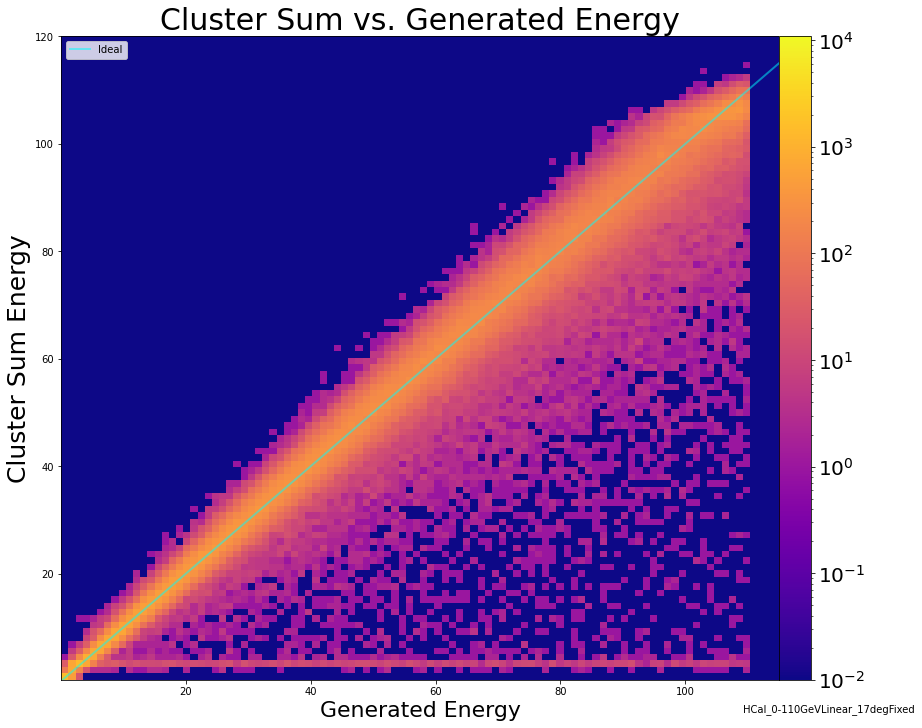

In [12]:
ClusterSum_vs_GenP(preds[:,0],y_test,label)

In [13]:
NN = get_res_scale(y_test,preds,binning=np.linspace(0.1,110,21))
strawman = get_res_scale(y_test,x_test,binning=np.linspace(0.1,110,21))
print(NN.keys())

/clusterfs/ml4hep_nvme2/ftoralesacosta/regressiononly/data_functions.py:70: RuntimeWarning: invalid value encountered in true_divide
  avg_truth = avg_truth/counter
/global/home/users/ftoralesacosta/anaconda3/envs/tin/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/clusterfs/ml4hep_nvme2/ftoralesacosta/regressiononly/data_functions.py:75: RuntimeWarning: Mean of empty slice
  avg_scale  =   np.nanmean(scale_array,axis=-1)
/global/home/users/ftoralesacosta/anaconda3/envs/tin/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:997: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


dict_keys(['avg_truth', 'resolution', 'median_scale', 'avg_scale', 'slices', 'scale_array'])


In [14]:
from predictions_plots import *

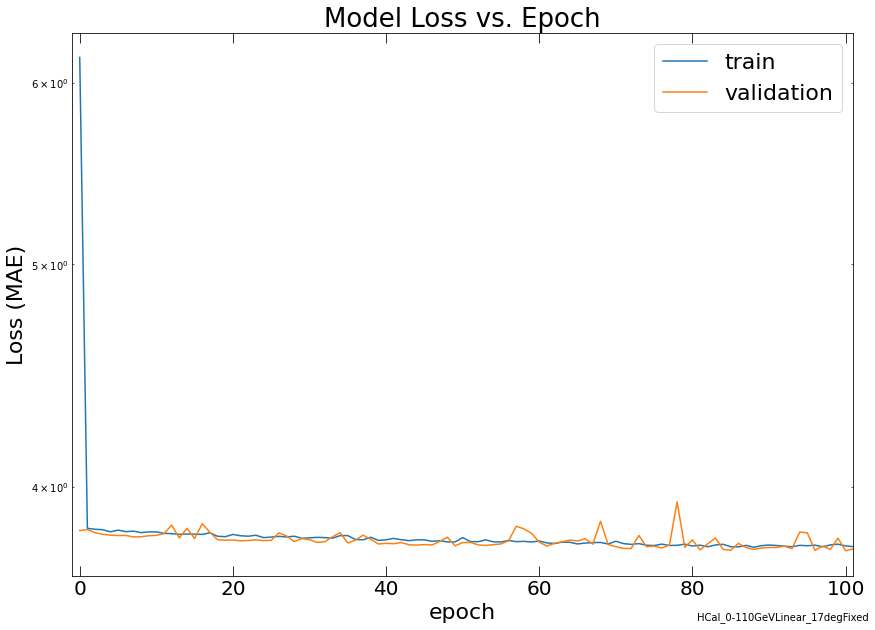

In [15]:
Plot_Loss_Curve(loss,val_loss,label,loss_string="MAE") #label loss yourself here

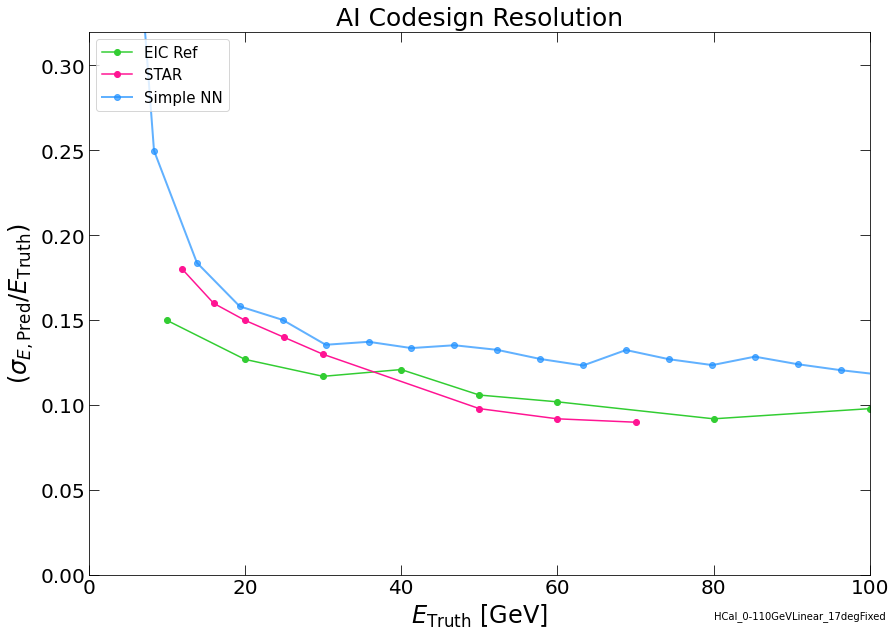

In [16]:
Plot_Resolutions(NN,strawman,label)

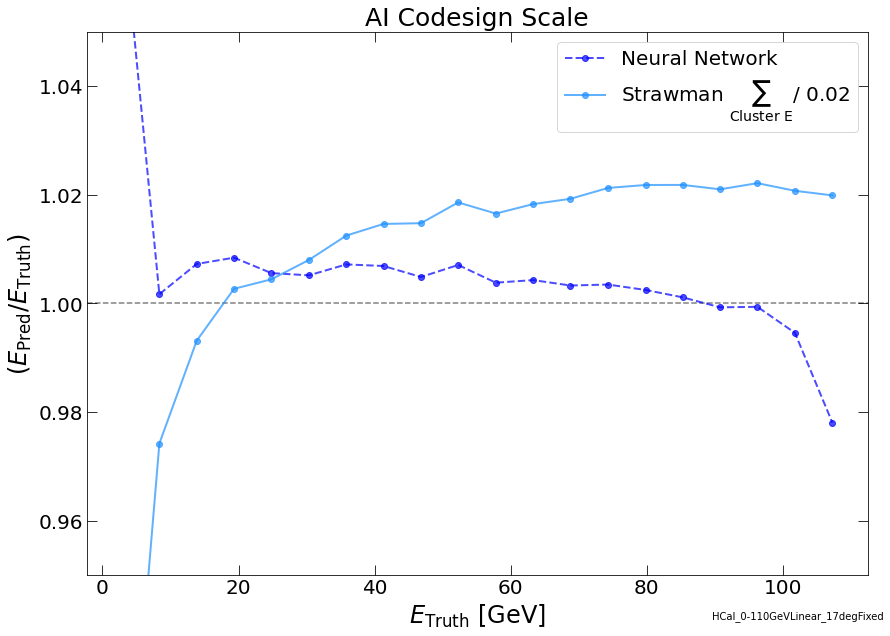

In [17]:
Plot_Energy_Scale(NN,strawman,label,sampling_fraction)